This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

Attention  
An order might have multiple items.  
Each item might be fulfilled by a distinct seller.  
All text identifying stores and partners where replaced by the names of Game of Thrones great houses.  
Example of a product listing on a marketplace

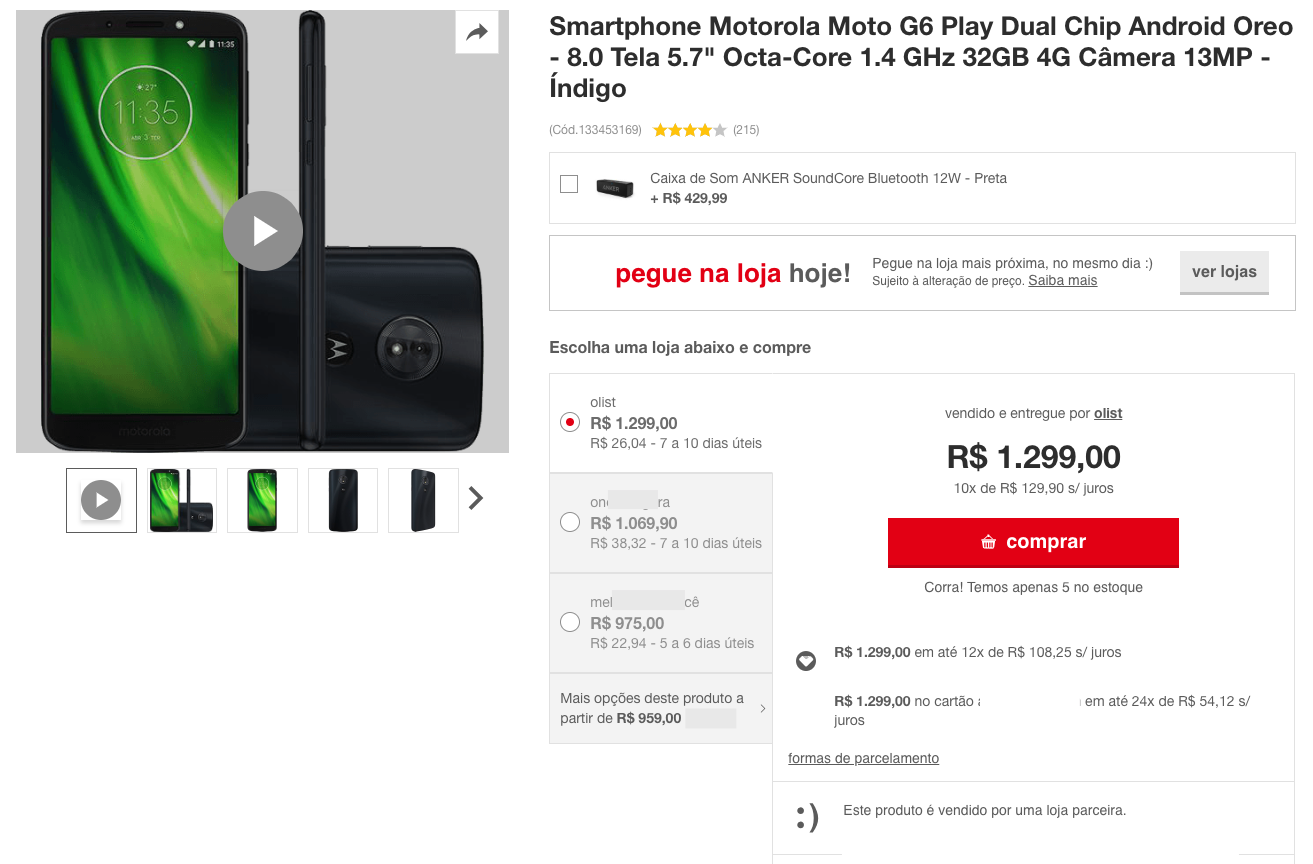

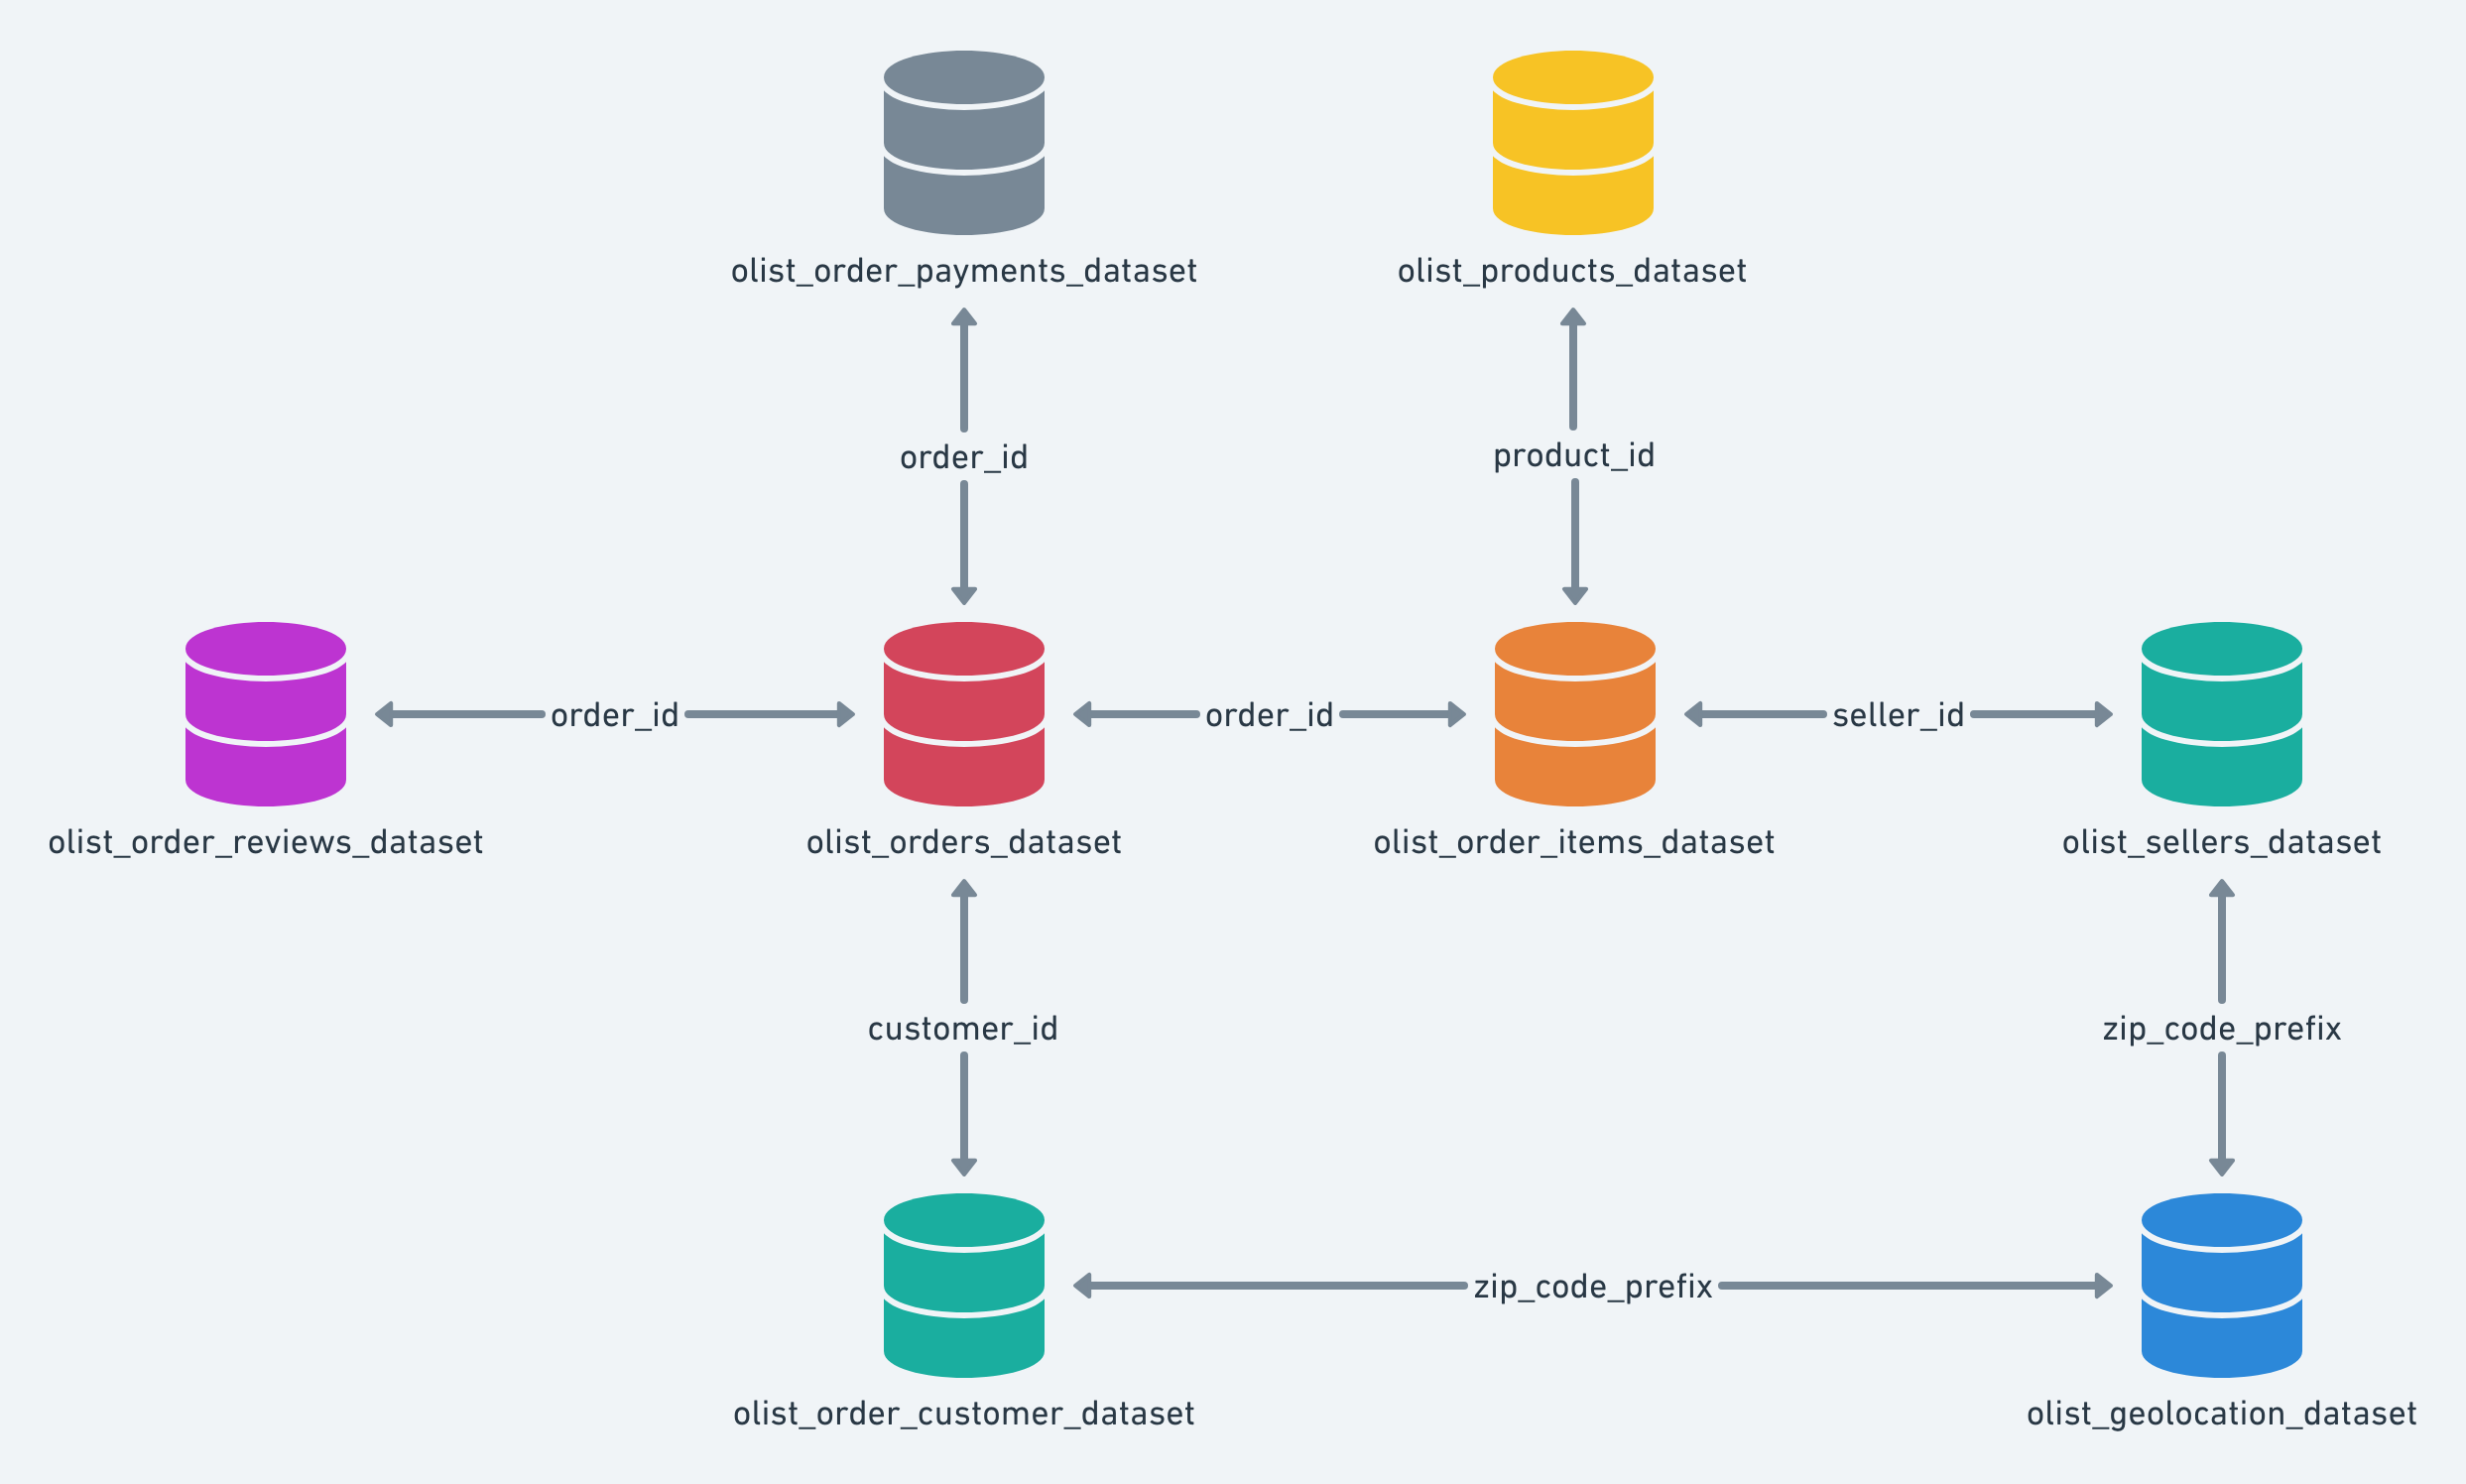

Je commence par importer les différentes librairies

In [6]:
from helpers import *

Je liste les fichiers

In [7]:
pd.DataFrame(os.listdir("../input/"), columns=["Nom des fichiers"])

,Nom des fichiers
0,olist_sellers_dataset.csv
1,product_category_name_translation.csv
2,olist_orders_dataset.csv
3,olist_order_items_dataset.csv
4,olist_customers_dataset.csv
5,olist_geolocation_dataset.csv
6,olist_order_payments_dataset.csv
7,olist_order_reviews_dataset.csv
8,olist_products_dataset.csv


Je créer un dataframe par fichier et stock chaque dataframe dans un objet avec pour clé le nom du fichier.  
Afin de les utiliser par la suite.

In [8]:
directory = "../input/"  
  
file_names = os.listdir(directory)  
data = {}

for file_name in file_names:  
    data[file_name] = pd.read_csv(os.path.join(directory, file_name))  
  

Je créer une fonction pour afficher les détails d'un fichier et j'affiche les détails de tous les fichiers

In [9]:
get_file_data(data, "olist_sellers_dataset.csv")

(3095, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
get_file_data(data,"product_category_name_translation.csv")

(71, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
get_file_data(data,"olist_orders_dataset.csv")

(99441, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
# Get the minimum and maximum dates  
first_order_date =  pd.to_datetime(data["olist_orders_dataset.csv"]["order_purchase_timestamp"]).min()
last_order_date =  pd.to_datetime(data["olist_orders_dataset.csv"]["order_purchase_timestamp"]).max()  
  
# Calculate the timedelta in days  
days_between = (last_order_date - first_order_date).days  

print("First Order", first_order_date)
print("Last Order", last_order_date)
print("Days Between min and max:", days_between)  


First Order 2016-09-04 21:15:19
Last Order 2018-10-17 17:30:18
Days Between min and max: 772


In [13]:
get_file_data(data,"olist_order_items_dataset.csv")

(112650, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
data["olist_order_items_dataset.csv"]["order_id"].value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: order_id, Length: 98666, dtype: int64

In [15]:
get_file_data(data,"olist_customers_dataset.csv")

(99441, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [16]:
get_file_data(data,"olist_geolocation_dataset.csv")

(1000163, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [17]:
get_file_data(data,"olist_order_payments_dataset.csv")

(103886, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [18]:
get_file_data(data,"olist_order_reviews_dataset.csv")

(99224, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [19]:
get_file_data(data,"olist_products_dataset.csv")

(32951, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Je vais créer un dataframe pour les clients, comme je veux les ségmenter, c'est dans ce dataframe que je vais rajouter toute les autres données.

In [20]:
clients = data["olist_customers_dataset.csv"]
orders = data["olist_orders_dataset.csv"]


In [21]:
clients.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

J'observe que customer_unique_id est la colonne qui représente un seul client.

In [22]:
print(clients.shape)
print(orders.shape)
orders.head()

(99441, 5)
(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


J'en conclue qu'une ligne dans customer_dataset est égale à une commande car le nombre de order_id est égale au nombre de customer_id.

Je fais une rapide observation des clients qui commande le plus

In [23]:
clients_count = clients.groupby('customer_unique_id').size().reset_index(name='nb_orders')
clients_count = clients_count.sort_values(by='nb_orders', ascending=False)
clients_count.head()

,customer_unique_id,nb_orders
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17
23472,3e43e6105506432c953e165fb2acf44c,9
37797,6469f99c1f9dfae7733b25662e7f1782,7
76082,ca77025e7201e3b30c44b472ff346268,7
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7


In [24]:
counts_table = pd.DataFrame(clients_count['nb_orders'].value_counts()).reset_index()  
counts_table.columns = ['NB Commande', 'Count']  
counts_table = counts_table.sort_values(by='NB Commande')  

# Display the table  
display(counts_table)

,NB Commande,Count
0,1,93099
1,2,2745
2,3,203
3,4,30
4,5,8
5,6,6
6,7,3
8,9,1
7,17,1


1
2
3
4
5
6
7
9
17


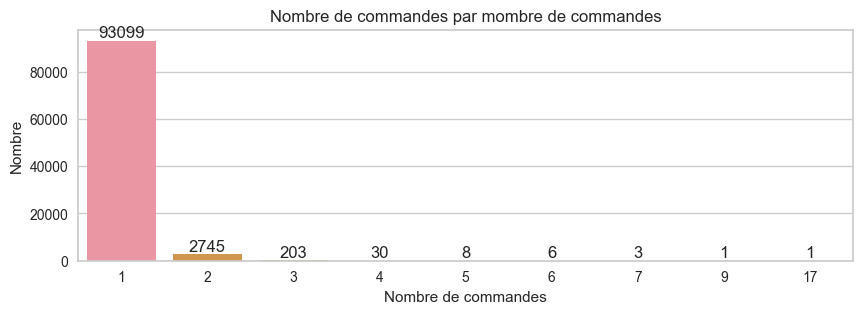

In [107]:
# Create the bar plot  
plt.figure(figsize=(10, 3))  
sns.barplot(data=counts_table, x='NB Commande', y='Count')  
plt.title('Nombre de commandes par mombre de commandes')  
plt.xlabel('Nombre de commandes')  
plt.ylabel('Nombre')  

i = 0
# Ajouter les numéros au-dessus de chaque barre  
for index, row in counts_table.iterrows():
    print(row['NB Commande'])
    plt.text(i, row['Count'], str(row['Count']), ha='center', va='bottom')
    i+=1
  
plt.show()  

Sans surprise beaucoup de clients qui ont fait qu'une commande.
J'observe un client en particulier pour voir si j'ai bien plusieurs fois le même clients avec le même unique id.

In [25]:
clients[clients["customer_unique_id"] == "8d50f5eadf50201ccdcedfb9e2ac8455"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
14186,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
15321,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
16654,897b7f72042714efaa64ac306ba0cafc,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
36122,b2b13de0770e06de50080fea77c459e6,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
38073,42dbc1ad9d560637c9c4c1533746f86d,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
40141,dfb941d6f7b02f57a44c3b7c3fefb44b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
48614,65f9db9dd07a4e79b625effa4c868fcb,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
52574,1c62b48fb34ee043310dcb233caabd2e,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
58707,a682769c4bc10fc6ef2101337a6c83c9,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
67996,6289b75219d757a56c0cce8d9e427900,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP


En observant celui qui en a commandé le plus, les donnnées de la localisation du client ne change pas.

Je vais pas pouvoir merge les clients en premier. Il va falloir que je merge les commande dans un premier temps.
Une fois les donnée de chaque commande traité, je pourrais combiner le tout par client.

Je commence par observer les avis des commandes

In [26]:
print(data["olist_order_reviews_dataset.csv"].shape)
data["olist_order_reviews_dataset.csv"].isna().sum()

(99224, 7)


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

J'ai plus d'avis que de commandes. Je vois que une commande peut avoir plusieurs fois le même id. 
Le client change d'avis entre temps.

Je vais merge les clients avec les commandes.

In [27]:
merged_orders = clients.merge(data["olist_orders_dataset.csv"], on="customer_id")  
print(merged_orders.shape)

(99441, 12)


Je vais maintenant ajouter les avis dans ce dataset, je vais conserver que les avis les plus récent par commandes.

In [28]:
orders_reviews = data["olist_order_reviews_dataset.csv"].copy()
# Sort to keep the most recent
orders_reviews = orders_reviews.sort_values('review_answer_timestamp', ascending=False)  
orders_reviews = orders_reviews.drop_duplicates('order_id')  
orders_reviews = orders_reviews.reset_index(drop=True)  

In [29]:
orders_reviews.shape

(98673, 7)

In [30]:
merged_orders = merged_orders.merge(orders_reviews[orders_reviews["order_id"].isin(merged_orders["order_id"])], on="order_id", how="outer")  
print(merged_orders.shape)

(99441, 18)


In [31]:
merged_orders["review_score"].isna().sum()

768

J'ai donc 768 produits qui n'ont pas d'avis. Je vais remplacer les valeurs manquantes par -1

In [32]:
merged_orders["review_score"].fillna(-1, inplace=True)
merged_orders["review_score"].isna().sum()

0

In [33]:
# data["olist_customers_dataset.csv"].head()
data["olist_orders_dataset.csv"].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


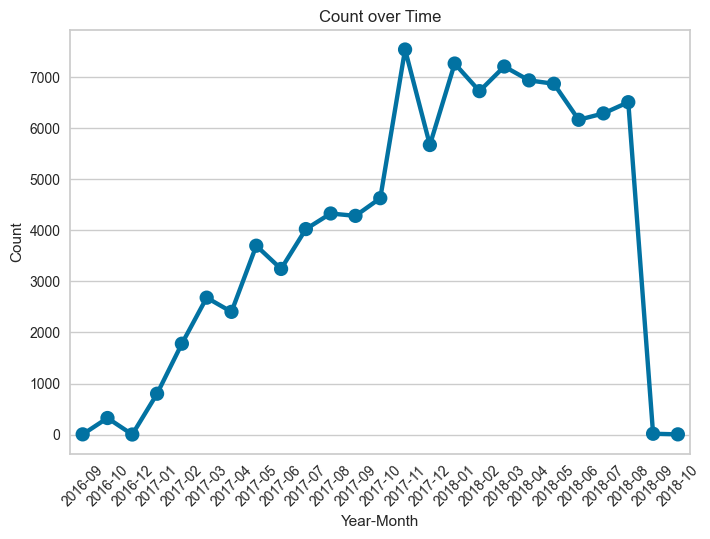

In [34]:
df = data["olist_orders_dataset.csv"].copy()

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])  # Group by year and month  
df['year_month'] = df['order_purchase_timestamp'].dt.to_period('M')   # Group by year and month  
# # Group by year_month and count the occurrences  
grouped_df = df.groupby('year_month').size().reset_index(name='count')

# Plot the count over time  
sns.pointplot(x='year_month', y='count', data=grouped_df)  
  
# Set the title and labels for the axes  
plt.title('Count over Time')  
plt.xlabel('Year-Month')  
plt.ylabel('Count')  
  
# Rotate the x-axis labels for better readability  
plt.xticks(rotation=45)  
  
# Show the plot  
plt.show()    

In [35]:
merged_orders.head()
merged_orders.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

Je change toutes les date en datetime et j'ajoute une colonne qui sera le temps de livraison

In [36]:
merged_orders["order_purchase_timestamp"] = pd.to_datetime(merged_orders["order_purchase_timestamp"])  
merged_orders["order_approved_at"] = pd.to_datetime(merged_orders["order_approved_at"])  
merged_orders["order_delivered_customer_date"] = pd.to_datetime(merged_orders["order_delivered_customer_date"])  
merged_orders["order_delivered_carrier_date"] = pd.to_datetime(merged_orders["order_delivered_carrier_date"])  
merged_orders["order_estimated_delivery_date"] = pd.to_datetime(merged_orders["order_estimated_delivery_date"])  
merged_orders["review_creation_date"] = pd.to_datetime(merged_orders["review_creation_date"])  
merged_orders["review_answer_timestamp"] = pd.to_datetime(merged_orders["review_answer_timestamp"])  

merged_orders["delivery_delay"] = (merged_orders["order_delivered_customer_date"] - merged_orders["order_purchase_timestamp"]).dt.days


In [37]:
merged_orders["delivery_delay"].isna().sum()

2965

2965 commandes non livrées. Je vais mettre un délai de livraison à 0.ß

In [38]:
merged_orders["delivery_delay"].fillna(-1,inplace=True)

In [39]:
print(merged_orders.shape)
merged_orders.head()

(99441, 19)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_delay
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26,2017-05-30 22:34:40,8.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30,2018-02-10 22:43:29,16.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15,2018-06-15 12:10:59,26.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29,2018-04-02 18:36:47,14.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,11.0


In [40]:

# olist_products_dataset
print(data["olist_order_items_dataset.csv"].shape)
data["olist_order_items_dataset.csv"].head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [41]:
data["olist_products_dataset.csv"].isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Je vais rajouter les catégorie de produits en anglais.
Pour tous les produits qui n'ont pas de catégorie, je créer une nouvelle catégorie undefined

In [42]:
data["product_category_name_translation.csv"] = data["product_category_name_translation.csv"].append({"product_category_name": "undefined", "product_category_name_english":"undefined"}, ignore_index=True)
data["olist_products_dataset.csv"]["product_category_name"].fillna("undefined", inplace=True)

/var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/ipykernel_2507/111684716.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data["product_category_name_translation.csv"] = data["product_category_name_translation.csv"].append({"product_category_name": "undefined", "product_category_name_english":"undefined"}, ignore_index=True)


In [43]:
data["olist_products_dataset.csv"].isna().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Je merge les items des commandes avec les détails des produits

In [44]:
item_dataset = data["olist_order_items_dataset.csv"].merge(data["olist_products_dataset.csv"], on="product_id")
item_dataset = item_dataset.merge(data["product_category_name_translation.csv"], on="product_category_name")

print(item_dataset.shape)
item_dataset.head()

(112626, 16)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [45]:
item_dataset["product_category_name_english"].isna().sum()

0

J'ai beaucoup de catégorie, je vais réduire toutes les catégories en 13 sous catégories.

In [46]:
categories = {  
'agro_industry_and_commerce': 'Home & Furniture',  
'air_conditioning': 'Electronics & Appliances',  
'art': 'Miscellaneous',  
'arts_and_craftmanship': 'Miscellaneous',  
'audio': 'Electronics & Appliances',  
'auto': 'Auto',  
'baby': 'Toys & Baby',  
'bed_bath_table': 'Home & Furniture',  
'books_general_interest': 'Books',  
'books_imported': 'Books',  
'books_technical': 'Books',  
'cds_dvds_musicals': 'Music',  
'christmas_supplies': 'Miscellaneous',  
'cine_photo': 'Electronics & Appliances',  
'computers': 'Electronics & Appliances',  
'computers_accessories': 'Electronics & Appliances',  
'consoles_games': 'Miscellaneous',  
'construction_tools_construction': 'Tools',  
'construction_tools_lights': 'Tools',  
'construction_tools_safety': 'Tools',  
'cool_stuff': 'Miscellaneous',  
'undefined': 'Miscellaneous',  
'costruction_tools_garden': 'Tools',  
'costruction_tools_tools': 'Tools',  
'diapers_and_hygiene': 'Toys & Baby',  
'drinks': 'Food and Drinks',  
'dvds_blu_ray': 'Electronics & Appliances',  
'electronics': 'Electronics & Appliances',  
'fashio_female_clothing': 'Fashion',  
'fashion_bags_accessories': 'Fashion',  
'fashion_childrens_clothes': 'Fashion',  
'fashion_male_clothing': 'Fashion',  
'fashion_shoes': 'Fashion',  
'fashion_sport': 'Sports',  
'fashion_underwear_beach': 'Fashion',  
'fixed_telephony': 'Electronics & Appliances',  
'flowers': 'Home & Furniture',  
'food': 'Food and Drinks',  
'food_drink': 'Food and Drinks',  
'furniture_bedroom': 'Home & Furniture',  
'furniture_decor': 'Home & Furniture',  
'furniture_living_room': 'Home & Furniture',  
'furniture_mattress_and_upholstery': 'Home & Furniture',  
'garden_tools': 'Tools',  
'health_beauty': 'Health and Beauty',  
'home_appliances': 'Electronics & Appliances',  
'home_appliances_2': 'Electronics & Appliances',  
'home_comfort_2': 'Home & Furniture',  
'home_confort': 'Home & Furniture',  
'home_construction': 'Home & Furniture',  
'housewares': 'Home & Furniture',  
'industry_commerce_and_business': 'Home & Furniture',  
'kitchen_dining_laundry_garden_furniture': 'Home & Furniture',  
'la_cuisine': 'Home & Furniture',  
'luggage_accessories': 'Fashion',  
'market_place': 'Miscellaneous',  
'music': 'Music',  
'musical_instruments': 'Music',  
'office_furniture': 'Home & Furniture',  
'party_supplies': 'Miscellaneous',  
'perfumery': 'Health and Beauty',  
'pet_shop': 'Pets',  
'security_and_services': 'Electronics & Appliances',  
'signaling_and_security': 'Electronics & Appliances',  
'small_appliances': 'Electronics & Appliances',  
'small_appliances_home_oven_and_coffee': 'Electronics & Appliances',  
'sports_leisure': 'Sports',  
'stationery': 'Home & Furniture',  
'tablets_printing_image': 'Electronics & Appliances',  
'telephony': 'Electronics & Appliances',  
'toys': 'Toys & Baby',  
'watches_gifts': 'Fashion'  
}    

item_dataset['category'] = item_dataset['product_category_name_english'].map(categories)
# item_dataset.drop("product_category_name_english", axis=1, inplace=True)

print("Missing value", item_dataset["category"].isna().sum())


item_dataset["category"].value_counts()



Missing value 0


Home & Furniture            33147
Electronics & Appliances    18451
Health and Beauty           13089
Fashion                      9695
Sports                       8671
Miscellaneous                7276
Toys & Baby                  7221
Tools                        6115
Auto                         4235
Pets                         1947
Food and Drinks              1167
Books                         880
Music                         732
Name: category, dtype: int64

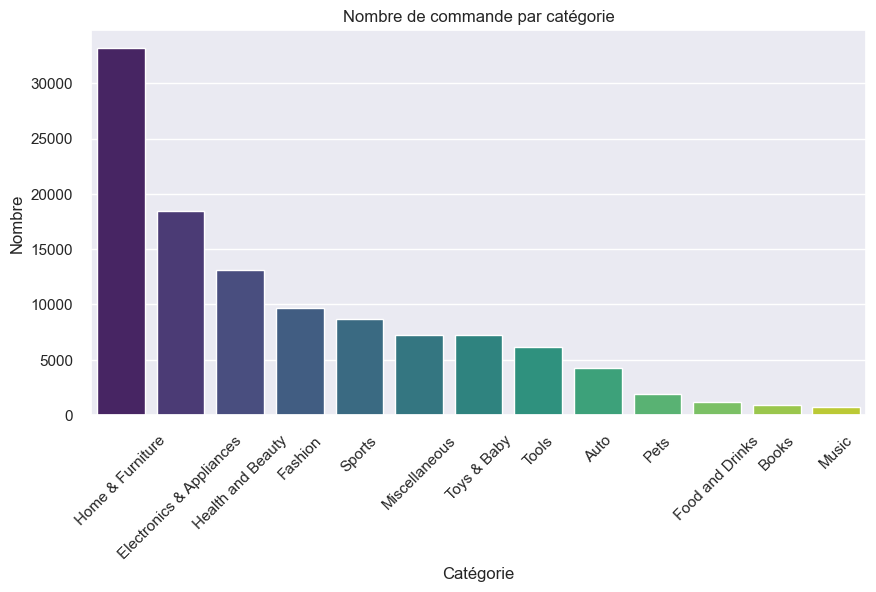

In [112]:
category_counts = item_dataset["category"].value_counts()  
sns.set(style="darkgrid")  
plt.figure(figsize=(10, 5))  
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")  
plt.title("Nombre de commande par catégorie")  
plt.xlabel("Catégorie")  
plt.ylabel("Nombre")  
plt.xticks(rotation=45)  
plt.show()  

Je fais du one-hot encoding sur les catégories pour pouvoir faire mon analyse par la suite

In [47]:
item_dataset_encoded = pd.get_dummies(item_dataset['category'], prefix='cat')  
item_dataset_encoded = pd.concat([item_dataset, item_dataset_encoded], axis=1)  

print(item_dataset_encoded.shape)
item_dataset_encoded.head()


(112626, 30)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,cat_Fashion,cat_Food and Drinks,cat_Health and Beauty,cat_Home & Furniture,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,0,0,0,0,1,0,0,0,0,0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,...,0,0,0,0,1,0,0,0,0,0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,...,0,0,0,0,1,0,0,0,0,0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,...,0,0,0,0,1,0,0,0,0,0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
item_dataset_encoded.shape

(112626, 30)

Je vais commencer par merge les items de chaque commandes

In [49]:
feature_cat_columns = [col for col in item_dataset_encoded.columns if col.startswith('cat_')]  

agg_dict = {'items_nb': ('order_item_id', 'count'),  
            'sum_price': ('price', 'sum'),  
            'sum_freight_value': ('freight_value', 'sum')}  
  
for col in feature_cat_columns:  
    agg_dict[col] = (col, 'max')  
order_items_agg = item_dataset_encoded.groupby('order_id').agg(**agg_dict).reset_index()  


In [50]:
print(order_items_agg.shape)
order_items_agg.head()

(98645, 17)


,order_id,items_nb,sum_price,sum_freight_value,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,cat_Health and Beauty,cat_Home & Furniture,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,0,0,0,0,0,0,0,1,0,0,0,0,0
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,0,0,0,0,0,0,0,0,0,1,0,0,0
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,0,0,0,0,0,0,1,0,0,0,0,0,0
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,0,0,0,0,0,1,0,0,0,0,0,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,0,0,0,0,0,0,0,0,0,0,0,1,0


In [51]:
print(len(order_items_agg[order_items_agg["items_nb"] > 1]))
# order_items_agg["total_price"] = order_items_agg["sum_price"] + order_items_agg["sum_freight_value"]
order_items_agg[order_items_agg["items_nb"] > 1][:5]

9800


,order_id,items_nb,sum_price,sum_freight_value,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,cat_Health and Beauty,cat_Home & Furniture,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby
13,0008288aa423d2a3f00fcb17cd7d8719,2,99.80,26.74,0,0,0,0,0,0,0,0,0,0,0,1,0
31,00143d0f86d6fbd9f9b38ab440ac16f5,3,63.99,45.30,0,0,0,0,0,0,0,0,0,0,1,0,0
39,001ab0a7578dd66cd4b0a71f5b6e1e41,3,74.67,52.89,0,0,1,0,0,0,0,0,0,0,0,0,0
43,001d8f0e34a38c37f7dba2a37d4eba8b,2,37.98,15.56,0,0,0,0,0,1,0,0,0,0,0,0,0
69,002c9def9c9b951b1bec6d50753c9891,2,156.00,17.80,0,0,0,0,0,0,1,0,0,0,0,0,0


In [52]:
data["olist_order_items_dataset.csv"][data["olist_order_items_dataset.csv"]["order_id"]== "0008288aa423d2a3f00fcb17cd7d8719"]


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37


In [53]:
print(merged_orders.shape)

(99441, 19)


In [54]:
merged_orders = merged_orders.merge(order_items_agg, on="order_id", how='outer')  
merged_orders.isna().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  160
order_delivered_carrier_date      1783
order_delivered_customer_date     2965
order_estimated_delivery_date        0
review_id                          768
review_score                         0
review_comment_title             87891
review_comment_message           58666
review_creation_date               768
review_answer_timestamp            768
delivery_delay                       0
items_nb                           796
sum_price                          796
sum_freight_value                  796
cat_Auto                           796
cat_Books                          796
cat_Electronics & Appliances       796
cat_Fashion              

Je m'assure que je remplace les valeurs manquantes

In [55]:
merged_orders["sum_price"].fillna(0, inplace=True)
merged_orders["items_nb"].fillna(0, inplace=True)

In [56]:
print(len(merged_orders[merged_orders["delivery_delay"] < 0]), "orders not delivered")
merged_orders["delivery_delay"].describe()


2965 orders not delivered


count    99441.000000
mean        11.703663
std          9.668263
min         -1.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_delay, dtype: float64

J'affiche les délai de livraison par commande pour avoir un rapide visuel

<Axes: xlabel='delivery_delay', ylabel='Count'>

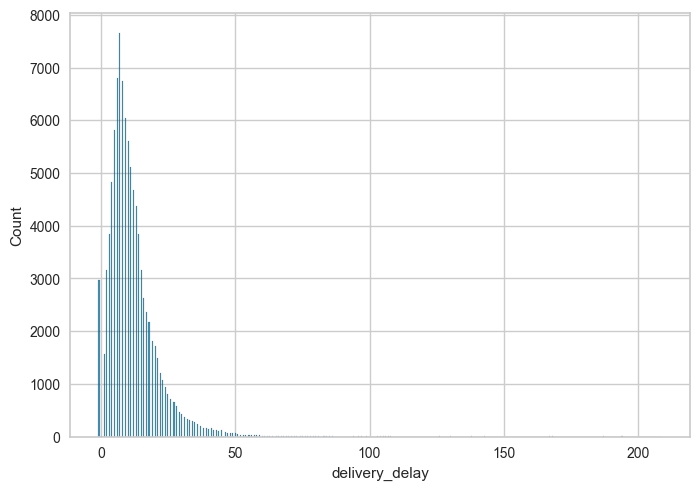

In [57]:
sns.histplot(data=merged_orders, x="delivery_delay")  

In [58]:
print(merged_orders.shape)
merged_orders.head()

(99441, 35)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,cat_Fashion,cat_Food and Drinks,cat_Health and Beauty,cat_Home & Furniture,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Maintenant je vais merge les commandes pour chaque clients.
De sorte à avoir un tableau ou chaque ligne correspond à un client pour les ségmenter

In [59]:
# Create the aggregation dictionary  
agg_dict = {'avg_delivery_delay': ('delivery_delay', 'mean'),  
            'items_nb': ('items_nb', 'sum'),  
            'orders_nb': ('order_id', 'count'),  
            'last_order_date': ('order_purchase_timestamp', 'max'),  
            'avg_satisfaction': ('review_score', 'mean'),  
            'sum_price': ('sum_price', 'sum'),  
            }  
  
# Add each feature column to the aggregation dictionary with 'first' as the aggregation function  
for col in feature_cat_columns:  
    agg_dict[col] = (col, 'sum')  
  
# Apply the aggregation operation  
df_pivot = merged_orders.groupby('customer_unique_id').agg(**agg_dict).reset_index()  

In [60]:
print(df_pivot.shape)
df_pivot.head()

(96096, 20)


,customer_unique_id,avg_delivery_delay,items_nb,orders_nb,last_order_date,avg_satisfaction,sum_price,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,cat_Health and Beauty,cat_Home & Furniture,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0,1.0,1,2018-05-10 10:56:27,5.0,129.90,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0,1.0,1,2018-05-07 11:11:27,4.0,18.90,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,25.0,1.0,1,2017-03-10 21:05:03,3.0,69.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,20.0,1.0,1,2017-10-12 20:29:41,4.0,25.99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,13.0,1.0,1,2017-11-14 19:45:42,5.0,180.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Je rajoute une colonne pour connaître la fréquence d'un utilisateur.  
Je prend en compte la date de sa dernière commande

In [61]:
# Most recent purchase
most_recent_purchase = df_pivot["last_order_date"].max()
print(most_recent_purchase)

# Add a new column to know the last purchase date
df_pivot["days_since_last_purchase"] = round((df_pivot["last_order_date"] - most_recent_purchase) / np.timedelta64(1, "D"))

2018-10-17 17:30:18


Mon but c'est d'avoir les colonnes rfm

In [62]:
# Recency = Days since last purchase
# Frequency = total number of transaction
# Monetary = Total money spent

In [63]:
df_pivot.isna().sum()

customer_unique_id              0
avg_delivery_delay              0
items_nb                        0
orders_nb                       0
last_order_date                 0
avg_satisfaction                0
sum_price                       0
cat_Auto                        0
cat_Books                       0
cat_Electronics & Appliances    0
cat_Fashion                     0
cat_Food and Drinks             0
cat_Health and Beauty           0
cat_Home & Furniture            0
cat_Miscellaneous               0
cat_Music                       0
cat_Pets                        0
cat_Sports                      0
cat_Tools                       0
cat_Toys & Baby                 0
days_since_last_purchase        0
dtype: int64

In [64]:
df_pivot.head()

,customer_unique_id,avg_delivery_delay,items_nb,orders_nb,last_order_date,avg_satisfaction,sum_price,cat_Auto,cat_Books,cat_Electronics & Appliances,...,cat_Food and Drinks,cat_Health and Beauty,cat_Home & Furniture,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby,days_since_last_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0,1.0,1,2018-05-10 10:56:27,5.0,129.90,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-160.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0,1.0,1,2018-05-07 11:11:27,4.0,18.90,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-163.0
2,0000f46a3911fa3c0805444483337064,25.0,1.0,1,2017-03-10 21:05:03,3.0,69.00,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-586.0
3,0000f6ccb0745a6a4b88665a16c9f078,20.0,1.0,1,2017-10-12 20:29:41,4.0,25.99,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-370.0
4,0004aac84e0df4da2b147fca70cf8255,13.0,1.0,1,2017-11-14 19:45:42,5.0,180.00,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-337.0


In [65]:
final_df = df_pivot.copy()
final_df["recency"] = final_df["days_since_last_purchase"]
final_df["frequency"] = final_df["orders_nb"]
final_df["monetary"] = final_df["sum_price"]

final_df.drop(columns=["days_since_last_purchase","orders_nb","sum_price" ], axis=1, inplace=True)

In [66]:
final_df["frequency"].value_counts()

1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: frequency, dtype: int64

In [67]:
final_df.head()

,customer_unique_id,avg_delivery_delay,items_nb,last_order_date,avg_satisfaction,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,...,cat_Home & Furniture,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0,1.0,2018-05-10 10:56:27,5.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-160.0,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0,1.0,2018-05-07 11:11:27,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-163.0,1,18.90
2,0000f46a3911fa3c0805444483337064,25.0,1.0,2017-03-10 21:05:03,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-586.0,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,20.0,1.0,2017-10-12 20:29:41,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-370.0,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,13.0,1.0,2017-11-14 19:45:42,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-337.0,1,180.00


Je calcul le RFM en utilisant un score entre 1-5

In [68]:
# # Calculate the quintiles for recency  
final_df['recency_score'] = pd.qcut(final_df['recency'], q=5, labels=False) + 1

final_df['frequency_rank'] = final_df['frequency'].rank(method='min')
# Calculate the quintiles for frequency  
final_df['frequency_score'] = pd.cut(final_df['frequency_rank'], bins=5, labels=False, include_lowest=True) + 1  
final_df.drop(['frequency_rank'], axis=1, inplace=True)
# # Calculate the quintiles for monetary  
final_df['monetary_score'] = pd.qcut(final_df['monetary'], q=5, labels=False) + 1  

In [69]:
# df_pivot["last_order_date"] = df_pivot["last_order_date"].values.astype(np.int64) // 10 ** 9
final_df.head()

,customer_unique_id,avg_delivery_delay,items_nb,last_order_date,avg_satisfaction,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,...,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0,1.0,2018-05-10 10:56:27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-160.0,1,129.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0,1.0,2018-05-07 11:11:27,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-163.0,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,25.0,1.0,2017-03-10 21:05:03,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-586.0,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,20.0,1.0,2017-10-12 20:29:41,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-370.0,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,13.0,1.0,2017-11-14 19:45:42,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-337.0,1,180.00,2,1,5


In [70]:
final_df["recency_score"].value_counts()

1    19333
3    19231
2    19225
4    19174
5    19133
Name: recency_score, dtype: int64

In [71]:
final_df["frequency_score"].value_counts()

1    93099
5     2997
Name: frequency_score, dtype: int64

In [72]:
final_df["monetary_score"].value_counts()

3    19465
1    19307
2    19251
4    19047
5    19026
Name: monetary_score, dtype: int64

In [73]:
final_df.head()

,customer_unique_id,avg_delivery_delay,items_nb,last_order_date,avg_satisfaction,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,...,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0,1.0,2018-05-10 10:56:27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-160.0,1,129.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0,1.0,2018-05-07 11:11:27,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-163.0,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,25.0,1.0,2017-03-10 21:05:03,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-586.0,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,20.0,1.0,2017-10-12 20:29:41,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-370.0,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,13.0,1.0,2017-11-14 19:45:42,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-337.0,1,180.00,2,1,5


~~Je commence par créer des fichiers csv pour effectuer des test différents.~~ (test non concluant)  
Je rajoute ensuite la combinaison de RFM score

In [74]:
# final_df[["recency","frequency","monetary", "avg_satisfaction"]].to_csv("rfm_review.csv", index=False)
# final_df[["recency_score","frequency_score","monetary_score", "avg_satisfaction"]].to_csv("rfm_review_score.csv", index=False)

final_df["rfm_score"] = final_df["recency_score"].astype(str) + final_df["frequency_score"].astype(str) +final_df["monetary_score"].astype(str)

Je veux pouvoir créer 3 jeux de données différents:

- Toutes les données
- 50% de clients qui ont 1 une commande & 50% de clients > 1 commande
- Undersampling

In [75]:
final_df["above_one_command"] = final_df["frequency_score"] > 1
final_df["above_one_command"].value_counts()

False    93099
True      2997
Name: above_one_command, dtype: int64

In [76]:

above_one_c = final_df[final_df['above_one_command'] == True].sample(frac=0.5)  
below_one_c = final_df[final_df['above_one_command'] == False].sample(frac=0.5)

df_half = pd.concat([above_one_c, below_one_c])
print("Above 1 command", len(df_half[df_half['above_one_command'] == True]))
print("Below 1 command", len(df_half[df_half['above_one_command'] == False]))
print(df_half.shape)
df_half.head()


Above 1 command 1498
Below 1 command 46550
(48048, 26)


,customer_unique_id,avg_delivery_delay,items_nb,last_order_date,avg_satisfaction,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,...,cat_Tools,cat_Toys & Baby,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,above_one_command
23681,3ec83b54e0afb70def9480cd6b9097f7,10.0,9.0,2018-02-27 12:23:58,3.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-232.0,2,1349.46,3,5,5,355,True
78182,d01cf8c6c7c836c5dd9320585928f42b,5.0,2.0,2018-04-15 19:42:06,2.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,-185.0,2,90.00,4,5,3,453,True
25853,44adda057b51a700d1e287783b02516e,5.5,2.0,2018-05-13 23:54:31,4.5,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-157.0,2,633.99,4,5,5,455,True
11776,1f22ecb07d25446bf52c51afa93cfa3b,1.5,1.0,2018-08-13 13:01:54,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-65.0,2,529.00,5,5,5,555,True
91413,f3738f6f5687da7c7ae0623172be00bf,13.0,2.0,2018-01-20 20:10:56,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-270.0,2,140.49,3,5,4,354,True


In [77]:
undersample_df = undersample_dataframe(final_df, "above_one_command")

In [78]:
undersample_df["above_one_command"].value_counts()

False    2997
True     2997
Name: above_one_command, dtype: int64

In [79]:
undersample_df[["recency","frequency","monetary", "avg_satisfaction"]].to_csv("rfm_review_undersample.csv", index=False)
undersample_df[["recency_score","frequency_score","monetary_score", "avg_satisfaction"]].to_csv("rfm_review_score_undersample.csv", index=False)

Je supprime les colonnes inutiles

In [80]:
final_df.drop(columns=["above_one_command", "recency","frequency","monetary"], axis=1, inplace=True)
undersample_df.drop(columns=["above_one_command", "recency","frequency","monetary"], axis=1, inplace=True)
df_half.drop(columns=["above_one_command", "recency","frequency","monetary"], axis=1, inplace=True)

In [81]:
final_df.head()

,customer_unique_id,avg_delivery_delay,items_nb,last_order_date,avg_satisfaction,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,...,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby,recency_score,frequency_score,monetary_score,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0,1.0,2018-05-10 10:56:27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0,1.0,2018-05-07 11:11:27,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1,411
2,0000f46a3911fa3c0805444483337064,25.0,1.0,2017-03-10 21:05:03,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,20.0,1.0,2017-10-12 20:29:41,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,13.0,1.0,2017-11-14 19:45:42,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,5,215


In [82]:
undersample_df.head()

,customer_unique_id,avg_delivery_delay,items_nb,last_order_date,avg_satisfaction,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,...,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby,recency_score,frequency_score,monetary_score,rfm_score
0,18e5c815bf3dd30fd8e56942c573d61f,1.0,1.0,2017-05-17 23:32:26,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,2,112
1,dd6a750c92768a89a7d9c5e819df852a,10.0,1.0,2018-01-22 23:55:38,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3,1,2,312
2,ecf7874aa8a2586adf6ca37fab21ecc2,27.0,1.0,2018-05-16 13:05:37,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,5,415
3,f93ab2cf61d78046d9e93ab7cb3b5285,5.0,1.0,2018-08-21 21:50:57,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,1,3,513
4,6316d662bf2427ba040e17b59e860600,20.0,1.0,2018-03-22 15:01:53,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2,412


In [83]:
# Test non concluant
# undersample_df[["recency_score","frequency_score","monetary_score", "rfm_score", "avg_satisfaction", "avg_delivery_delay"]].to_csv("rfm_and_delay_undersample.csv", index=False)
# final_df[["recency_score","frequency_score","monetary_score", "rfm_score", "avg_satisfaction", "avg_delivery_delay"]].to_csv("rfm_and_delay.csv", index=False)


In [84]:
undersample_df.head()


,customer_unique_id,avg_delivery_delay,items_nb,last_order_date,avg_satisfaction,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,...,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby,recency_score,frequency_score,monetary_score,rfm_score
0,18e5c815bf3dd30fd8e56942c573d61f,1.0,1.0,2017-05-17 23:32:26,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,2,112
1,dd6a750c92768a89a7d9c5e819df852a,10.0,1.0,2018-01-22 23:55:38,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3,1,2,312
2,ecf7874aa8a2586adf6ca37fab21ecc2,27.0,1.0,2018-05-16 13:05:37,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,5,415
3,f93ab2cf61d78046d9e93ab7cb3b5285,5.0,1.0,2018-08-21 21:50:57,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,1,3,513
4,6316d662bf2427ba040e17b59e860600,20.0,1.0,2018-03-22 15:01:53,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2,412


In [85]:
final_df.head()

,customer_unique_id,avg_delivery_delay,items_nb,last_order_date,avg_satisfaction,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,...,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby,recency_score,frequency_score,monetary_score,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0,1.0,2018-05-10 10:56:27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0,1.0,2018-05-07 11:11:27,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1,411
2,0000f46a3911fa3c0805444483337064,25.0,1.0,2017-03-10 21:05:03,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,20.0,1.0,2017-10-12 20:29:41,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,13.0,1.0,2017-11-14 19:45:42,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,5,215


In [86]:
print(final_df.shape)
print(df_half.shape)
print(undersample_df.shape)

(96096, 22)
(48048, 22)
(5994, 22)


Je sauvegarde les 3 fichiers. Je vais pouvoir commencer mon analyse avec les plus petites données pour commencer.
Puis je testerai les autres

In [87]:
undersample_df.to_csv("full_data_undersample.csv", index=False)
final_df.to_csv("full_data.csv", index=False)
df_half.to_csv("full_data_half.csv", index=False)